In [2]:
from google.colab import files
uploaded = files.upload()

Saving healthcare_dataset.csv to healthcare_dataset.csv


In [3]:
import pandas as pd
df = pd.read_csv(list(uploaded.keys())[0])

In [4]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [7]:
df.isnull().sum()

,0
Name,0
Age,0
Gender,0
Blood Type,0
Medical Condition,0
Date of Admission,0
Doctor,0
Hospital,0
Insurance Provider,0
Billing Amount,0


In [8]:
duplicate_rows = df[df.duplicated()]
print(f"number of duplicated Rows:", {len(duplicate_rows)})

number of duplicated Rows: {534}


In [9]:
df_cleaned = df.drop_duplicates()

In [10]:
d = df_cleaned[df_cleaned.duplicated()]
print(f"number of duplicated Rows:", {len(d)})

number of duplicated Rows: {0}


In [11]:
df_cleaned = df_cleaned.copy()

from sklearn.preprocessing import LabelEncoder, StandardScaler

categorical_cols = ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results' ]

non_categorical_cols = ['Age', 'Billing Amount', 'Room Number']

le = LabelEncoder()
scaler = StandardScaler()

for col in categorical_cols:
  df_cleaned[col] = le.fit_transform(df_cleaned[col])

for col in non_categorical_cols:
  df_cleaned[col] = scaler.fit_transform(df_cleaned[[col]])


In [15]:
df_cleaned.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,3068,-1.098427,1,5,2,1729,26612,29933,1,-0.470713,0.233250,2,1730,3,2
1,15211,0.533770,1,0,5,104,33648,16012,3,0.570021,-0.313520,1,109,1,1
2,6476,1.247856,0,1,5,1233,37828,5473,0,0.169675,-0.834253,1,1247,0,2
3,26935,-1.200439,0,6,3,560,22511,12317,3,0.870301,1.292075,0,589,1,0
4,26241,-0.435347,0,2,2,1230,21259,33598,0,-0.795732,1.361506,2,1249,4,0


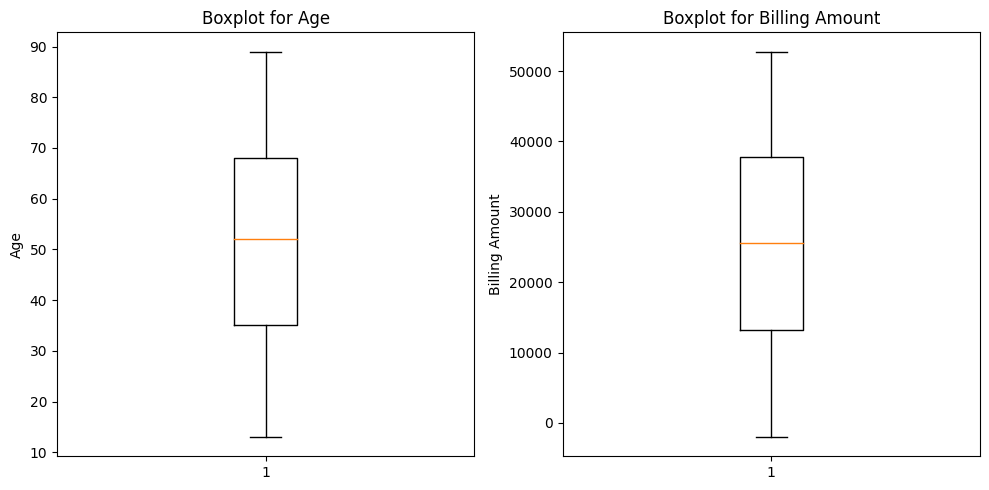

In [19]:
import matplotlib.pyplot as plt

# Boxplot for Age
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(df['Age'])
plt.title('Boxplot for Age')
plt.ylabel('Age')

# Boxplot for Billing Amount
plt.subplot(1, 2, 2)
plt.boxplot(df['Billing Amount'])
plt.title('Boxplot for Billing Amount')
plt.ylabel('Billing Amount')

plt.tight_layout()
plt.show()

In [21]:
# Detecting outliers
def detect_outliers(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  Lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < Lower_bound) | (df[column] > upper_bound)]
  num_outliers = outliers.shape[0]

  print(f"Number of outliers in {column}: {num_outliers}")

  return outliers

for col in non_categorical_cols:
  outliers = detect_outliers(df, col)

Number of outliers in Age: 0
Number of outliers in Billing Amount: 0
Number of outliers in Room Number: 0


In [23]:
# check for class imabalance
print(df_cleaned['Test Results'].value_counts())

Test Results
0    18437
2    18331
1    18198
Name: count, dtype: int64


In [26]:
# Check for multi-collinearity via Variace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(df_cleaned.drop(['Test Results','Discharge Date'], axis = 1)) # add a constant to the dataset for the intercept

# Calculating VIF for each feature
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)

              Features        VIF
0                const  24.103372
1                 Name   1.000150
2                  Age   1.000123
3               Gender   1.000328
4           Blood Type   1.000090
5    Medical Condition   1.000130
6    Date of Admission   1.000235
7               Doctor   1.000266
8             Hospital   1.000089
9   Insurance Provider   1.000271
10      Billing Amount   1.000141
11         Room Number   1.000332
12      Admission Type   1.000307
13          Medication   1.000275


In [29]:
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df_cleaned.drop(['Test Results','Discharge Date'], axis = 1)
y = df_cleaned['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.72      0.45      3616
           1       0.34      0.23      0.27      3682
           2       0.35      0.06      0.11      3696

    accuracy                           0.33     10994
   macro avg       0.34      0.34      0.28     10994
weighted avg       0.34      0.33      0.28     10994

Accuracy: 0.33372748772057487
